In [103]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df_trip = pd.read_csv("trip_updates_(unix_time).csv")
df_vehicle = pd.read_csv("vehicle_positions_(unix_time).csv")

frames = [df_trip, df_vehicle]

df = pd.merge(df_trip, df_vehicle, on=['trip_id','route_id'], how='inner')
df.head()


,trip_id,route_id,stop_id,arrival_time,departure_time,vehicle_id,label,latitude,longitude,bearing,speed,timestamp
0,4065__461034_Timetable_-_2025-02,419,93568,1742663058,1742663114,8584,NaN,43.954517,-78.866684,NaN,NaN,1742662783
1,4065__461034_Timetable_-_2025-02,419,3537,1742663114,1742663114,8584,NaN,43.954517,-78.866684,NaN,NaN,1742662783
2,4065__461034_Timetable_-_2025-02,419,3535,1742663136,1742663136,8584,NaN,43.954517,-78.866684,NaN,NaN,1742662783
3,4065__461034_Timetable_-_2025-02,419,3422,1742663173,1742663173,8584,NaN,43.954517,-78.866684,NaN,NaN,1742662783
4,4065__461034_Timetable_-_2025-02,419,3366,1742663219,1742663219,8584,NaN,43.954517,-78.866684,NaN,NaN,1742662783


In [104]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1220 entries, 0 to 1219
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   trip_id         1220 non-null   object 
 1   route_id        1220 non-null   int64  
 2   stop_id         1220 non-null   int64  
 3   arrival_time    1220 non-null   int64  
 4   departure_time  1220 non-null   int64  
 5   vehicle_id      1220 non-null   int64  
 6   label           0 non-null      float64
 7   latitude        1220 non-null   float64
 8   longitude       1220 non-null   float64
 9   bearing         0 non-null      float64
 10  speed           0 non-null      float64
 11  timestamp       1220 non-null   int64  
dtypes: float64(5), int64(6), object(1)
memory usage: 114.5+ KB


In [105]:
df['trip_id'] = df['trip_id'].astype(dtype='category')
df['trip_id_codes'] = df['trip_id'].cat.codes
df.drop(['trip_id'], inplace=True, axis=1)

In [106]:
# drop NaN columns 'bearing', 'speed', 'route_id_y'
df.isnull().sum()
df.drop(columns=['bearing', 'speed', 'label'], inplace=True)


In [107]:
df.head()

,route_id,stop_id,arrival_time,departure_time,vehicle_id,latitude,longitude,timestamp,trip_id_codes
0,419,93568,1742663058,1742663114,8584,43.954517,-78.866684,1742662783,27
1,419,3537,1742663114,1742663114,8584,43.954517,-78.866684,1742662783,27
2,419,3535,1742663136,1742663136,8584,43.954517,-78.866684,1742662783,27
3,419,3422,1742663173,1742663173,8584,43.954517,-78.866684,1742662783,27
4,419,3366,1742663219,1742663219,8584,43.954517,-78.866684,1742662783,27


In [111]:
df.corr()

,route_id,stop_id,arrival_time,departure_time,vehicle_id,latitude,longitude,timestamp,trip_id_codes
route_id,1.000000,-0.192043,0.285021,0.286646,0.051961,-0.015972,-0.116534,0.038496,0.252742
stop_id,-0.192043,1.000000,0.017329,0.016053,0.018224,-0.019731,0.039594,0.085690,-0.111252
arrival_time,0.285021,0.017329,1.000000,0.999418,-0.103450,-0.148370,-0.122326,0.195545,0.037328
departure_time,0.286646,0.016053,0.999418,1.000000,-0.103392,-0.149251,-0.121417,0.196191,0.038545
vehicle_id,0.051961,0.018224,-0.103450,-0.103392,1.000000,-0.289911,-0.044632,-0.319857,0.533761
latitude,-0.015972,-0.019731,-0.148370,-0.149251,-0.289911,1.000000,0.461854,-0.158722,-0.275520
longitude,-0.116534,0.039594,-0.122326,-0.121417,-0.044632,0.461854,1.000000,-0.374367,-0.040930
timestamp,0.038496,0.085690,0.195545,0.196191,-0.319857,-0.158722,-0.374367,1.000000,-0.218484
trip_id_codes,0.252742,-0.111252,0.037328,0.038545,0.533761,-0.275520,-0.040930,-0.218484,1.000000


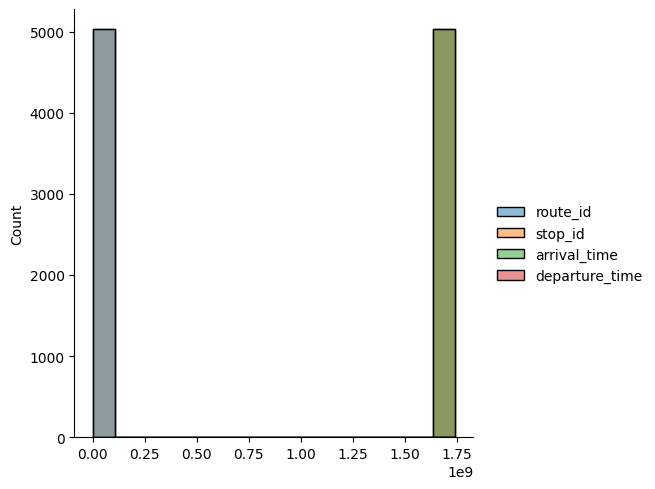

In [ ]:
import seaborn as sns

sns.heatmap(df.corr())
# df.value_counts().plot(kind='bar')